https://nickmccullum.com/python-machine-learning/k-nearest-neighbors-python/

# Importing the Data Set Into Our Python Script

In [30]:
import pandas as pd

raw_data = pd.read_csv('classified_data.csv', index_col = 0)

raw_data

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


# Standardizing the Data Set

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(raw_data.drop('TARGET CLASS', axis=1))

scaled_features = scaler.transform(raw_data.drop('TARGET CLASS', axis=1))

scaled_data = pd.DataFrame(scaled_features, columns = raw_data.drop('TARGET CLASS', axis=1).columns)

# Splitting the Data Set Into Training Data and Test Data

In [32]:
from sklearn.model_selection import train_test_split

x = scaled_data

y = raw_data['TARGET CLASS']

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)

# Training a K Nearest Neighbors Model

In [33]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 1)

model.fit(x_training_data, y_training_data)

KNeighborsClassifier(n_neighbors=1)

# Making Predictions With Our K Nearest Neighbors Algorithm

In [34]:
predictions = model.predict(x_test_data)

# Measuring the Accuracy of Our Model

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       144
           1       0.92      0.91      0.92       156

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [36]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test_data, predictions))

[[132  12]
 [ 14 142]]


# Choosing An Optimal K Value Using the Elbow Method

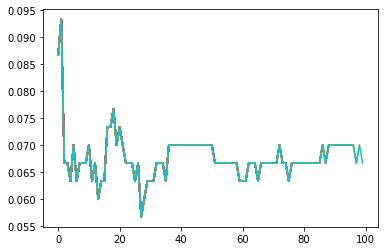

In [37]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

error_rates = []

for i in np.arange(1, 101):

    new_model = KNeighborsClassifier(n_neighbors = i)

    new_model.fit(x_training_data, y_training_data)

    new_predictions = new_model.predict(x_test_data)

    error_rates.append(np.mean(new_predictions != y_test_data))
    
    plt.plot(error_rates)

As you can see, our error rates tend to be minimized with a K value of approximately 30. This means that 30 is a suitable choice for K that balances both simplicity and predictive power.

# Conclusion

In [38]:
model = KNeighborsClassifier(n_neighbors = 30)

model.fit(x_training_data, y_training_data)

predictions = model.predict(x_test_data)

print(classification_report(y_test_data, predictions))

print(confusion_matrix(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       144
           1       0.94      0.94      0.94       156

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

[[134  10]
 [  9 147]]
